Train shape: (1460, 81)
Test shape: (1459, 80)


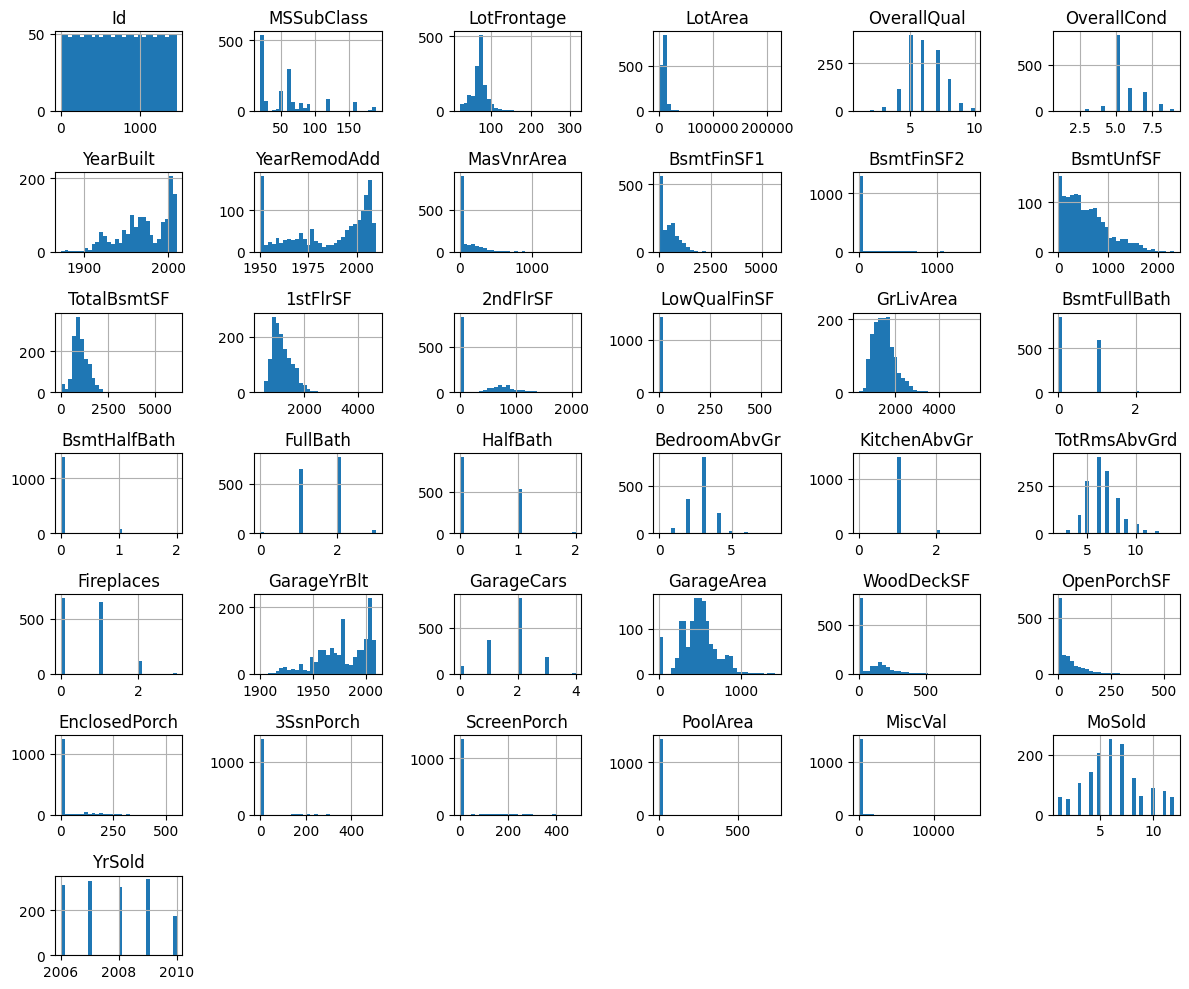

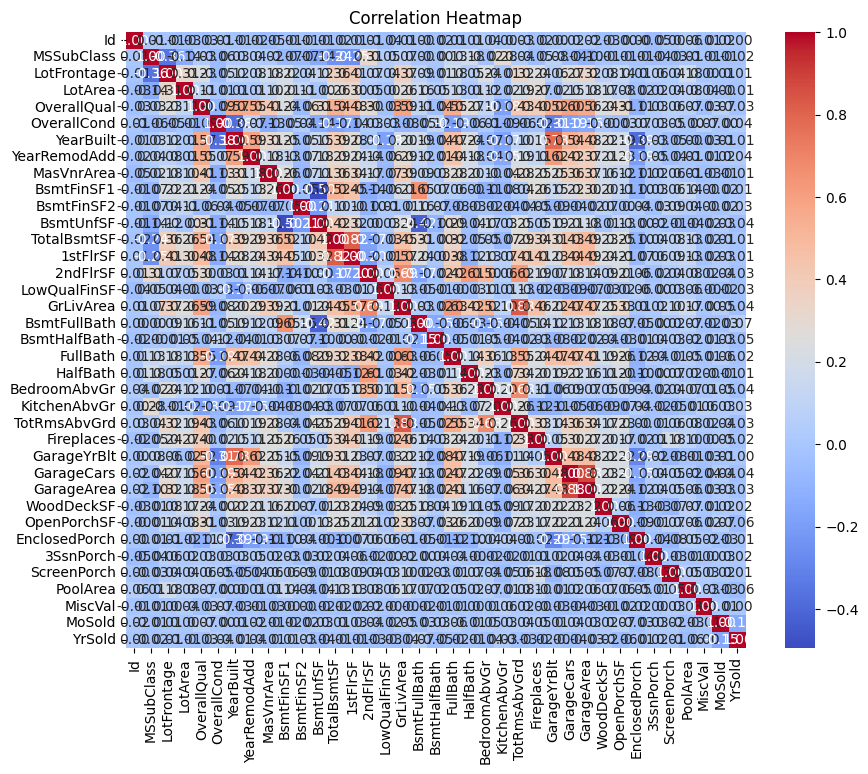

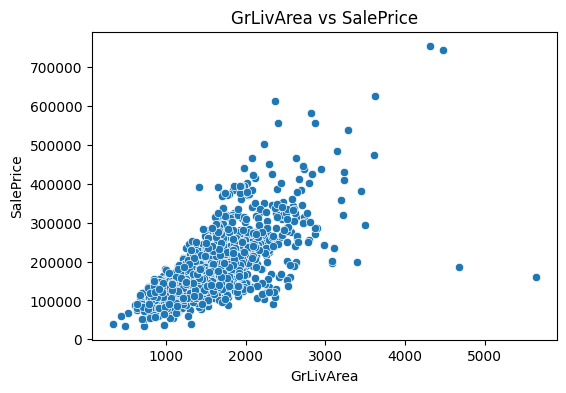

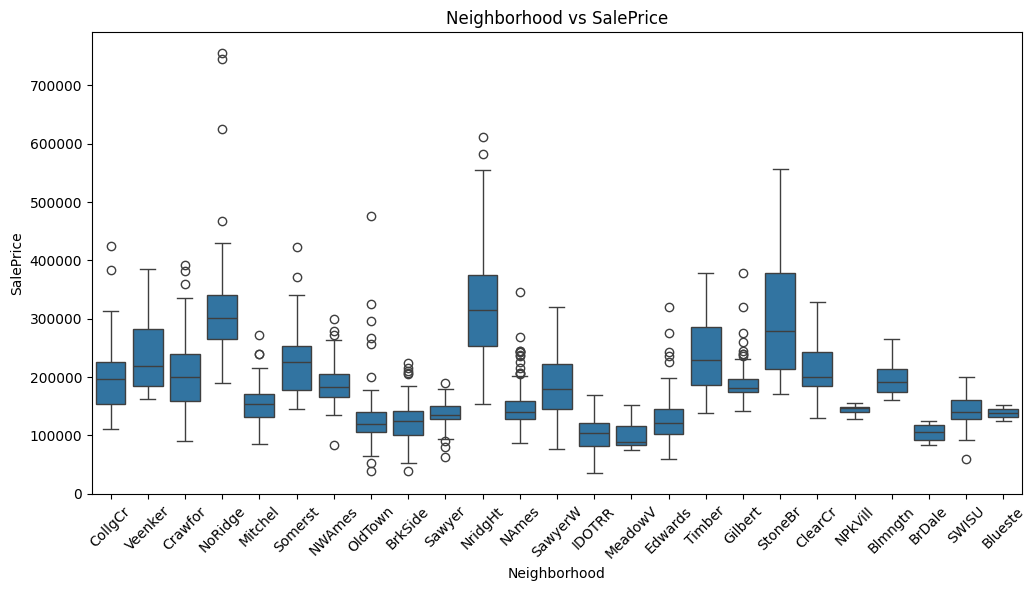


=== Train Set ===
MSE: 382452042.15
RMSE: 19556.38
R²: 0.9359

=== Validation Set ===
MSE: 873794723.71
RMSE: 29560.02
R²: 0.8861


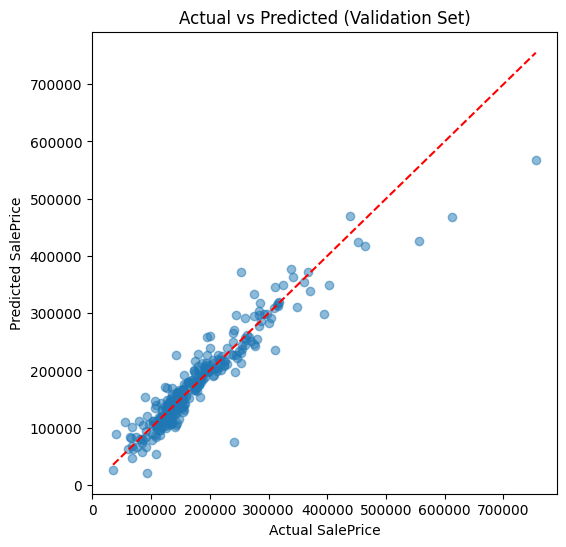

In [ ]:
# ======================
# 📌 LIBRARY IMPORT
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import urllib.request

# ======================
# 📌 DOWNLOAD FILES
# ======================
url_train = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv'
url_test = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv'

urllib.request.urlretrieve(url_train, '/content/train.csv')
urllib.request.urlretrieve(url_test, '/content/test.csv')

# ======================
# 📌 LOAD DATA
# ======================
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

# ======================
# 📌 FEATURE ENGINEERING
# ======================
target_col = 'SalePrice'

num_cols_train = df_train.drop(columns=target_col).select_dtypes(include=['int64', 'float64']).columns
cat_cols_train = df_train.drop(columns=target_col).select_dtypes(include=['object']).columns

num_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns
cat_cols_test = df_test.select_dtypes(include=['object']).columns

df_train[num_cols_train] = df_train[num_cols_train].fillna(df_train[num_cols_train].mean())
df_test[num_cols_test] = df_test[num_cols_test].fillna(df_test[num_cols_test].mean())

df_train[cat_cols_train] = df_train[cat_cols_train].fillna(df_train[cat_cols_train].mode().iloc[0])
df_test[cat_cols_test] = df_test[cat_cols_test].fillna(df_test[cat_cols_test].mode().iloc[0])

# ======================
# 📌 ENCODING
# ======================
combined = pd.concat([df_train.drop(columns=target_col), df_test], axis=0)
combined_encoded = pd.get_dummies(combined)

X = combined_encoded.iloc[:df_train.shape[0], :]
X_test_final = combined_encoded.iloc[df_train.shape[0]:, :]
y = df_train[target_col]

# ======================
# 📌 SPLIT TRAIN/VALIDATION UNTUK CEK OVERFITTING
# ======================
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================
# 📌 SCALING
# ======================
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ======================
# 📌 EDA & VISUALISASI
# ======================
df_train[num_cols_train].hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df_train[num_cols_train].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

if 'GrLivArea' in df_train.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
    plt.title("GrLivArea vs SalePrice")
    plt.show()

if 'Neighborhood' in df_train.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df_train['Neighborhood'], y=df_train['SalePrice'])
    plt.xticks(rotation=45)
    plt.title("Neighborhood vs SalePrice")
    plt.show()

# ======================
# 📌 MODEL TRAINING
# ======================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ======================
# 📌 EVALUASI
# ======================
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {label} ===")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return mse, rmse, r2

mse_train, rmse_train, r2_train = evaluate(y_train, y_train_pred, "Train Set")
mse_val, rmse_val, r2_val = evaluate(y_val, y_val_pred, "Validation Set")

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted (Validation Set)")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()


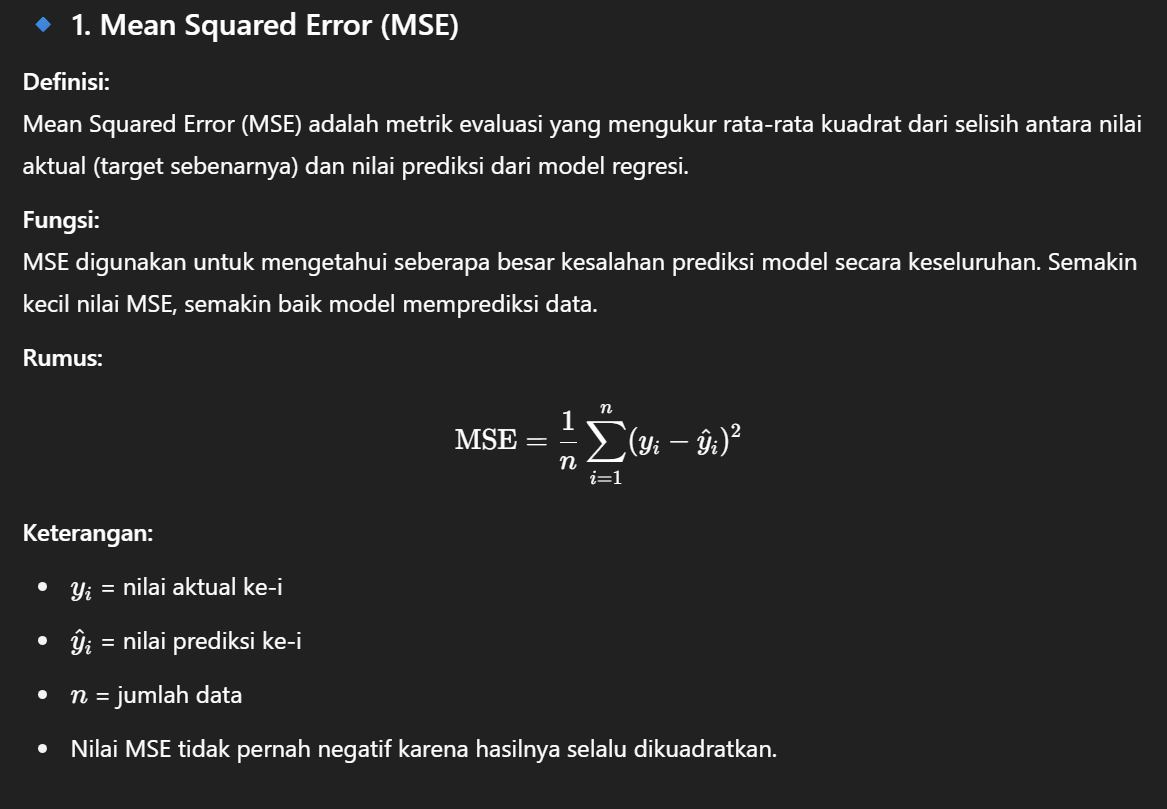

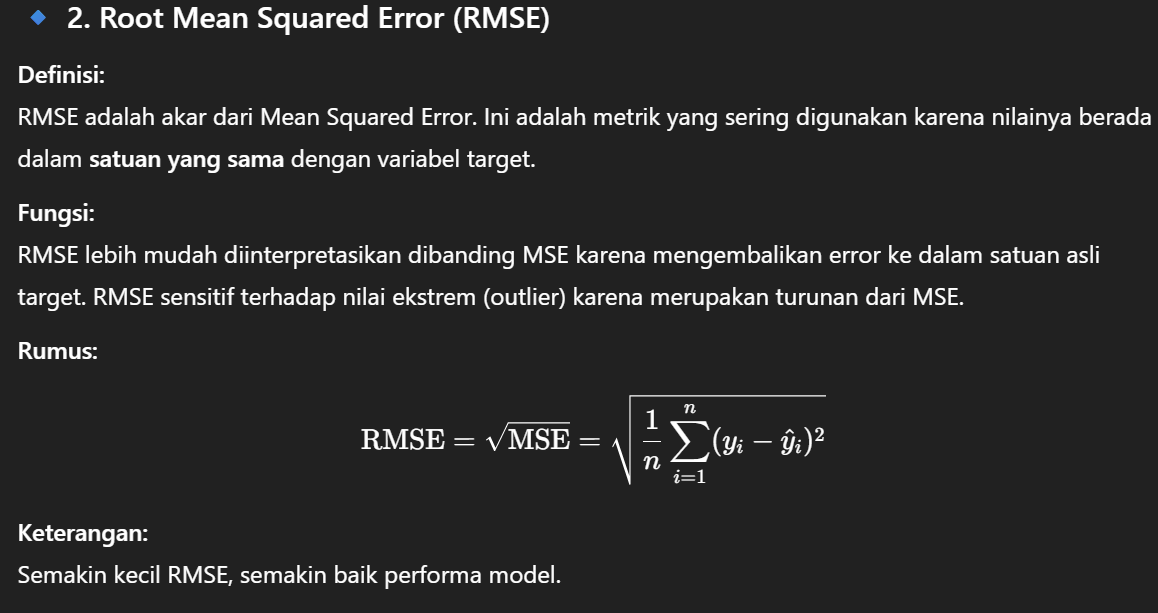

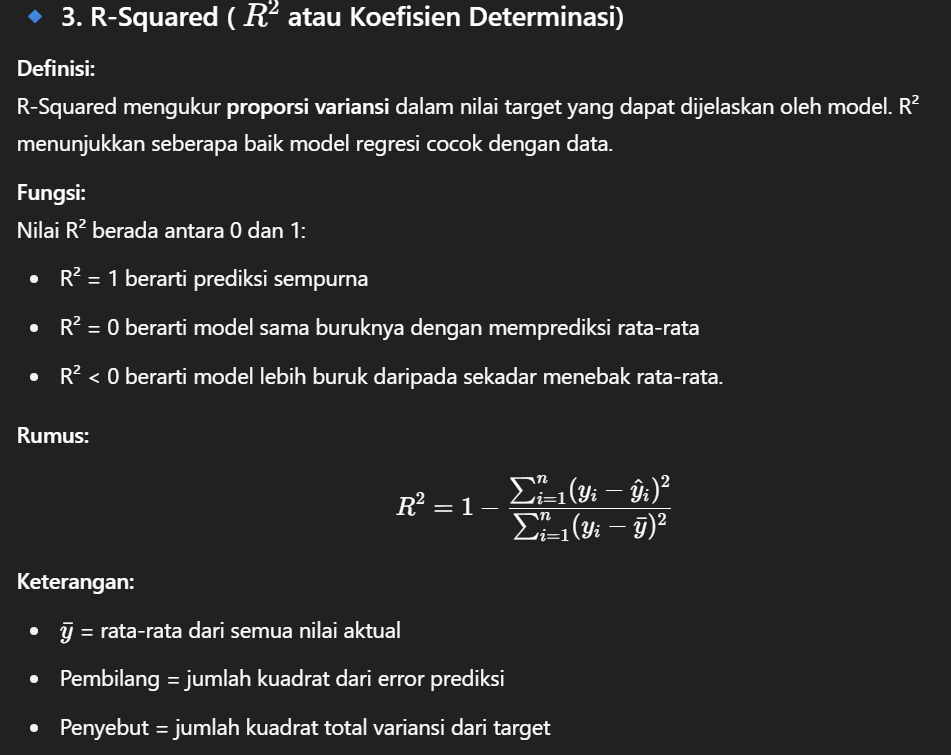

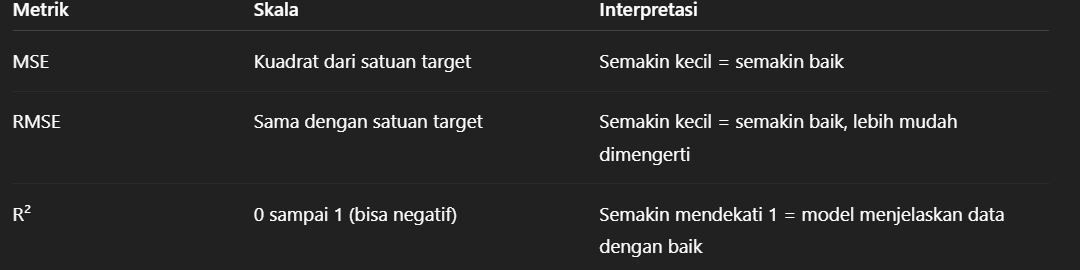